/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator


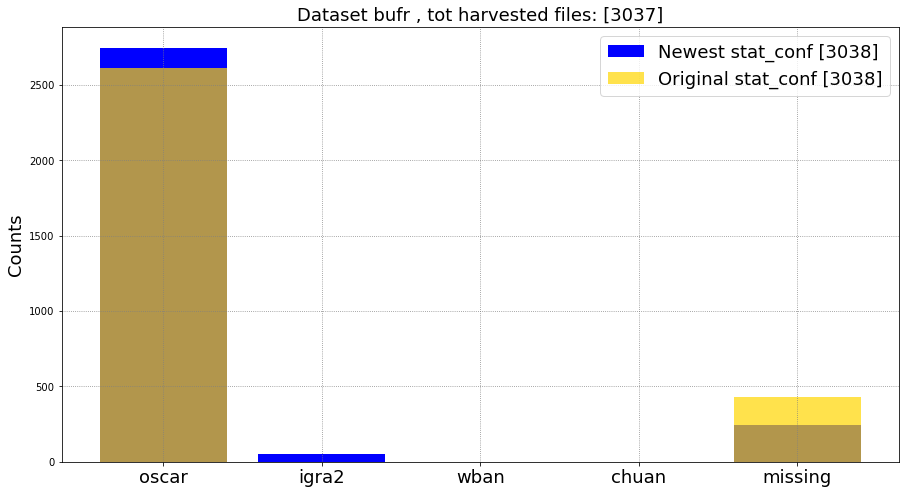

<Figure size 432x288 with 0 Axes>

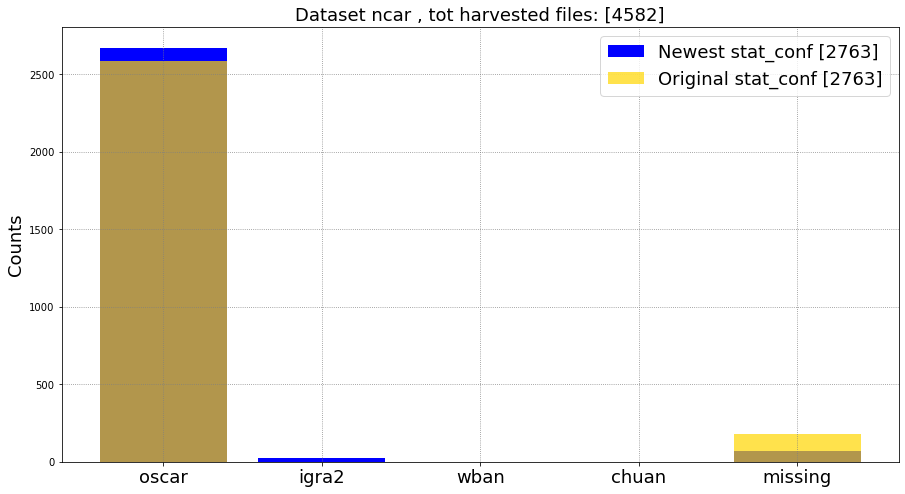

<Figure size 432x288 with 0 Axes>

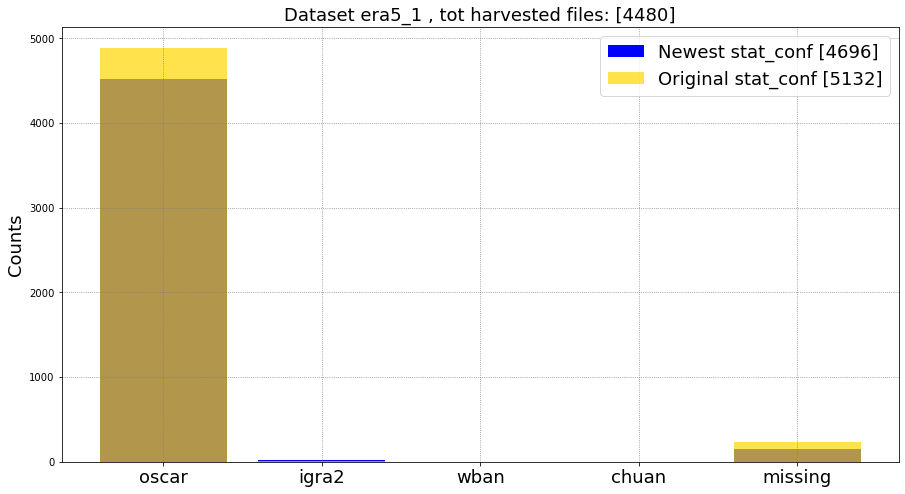

<Figure size 432x288 with 0 Axes>

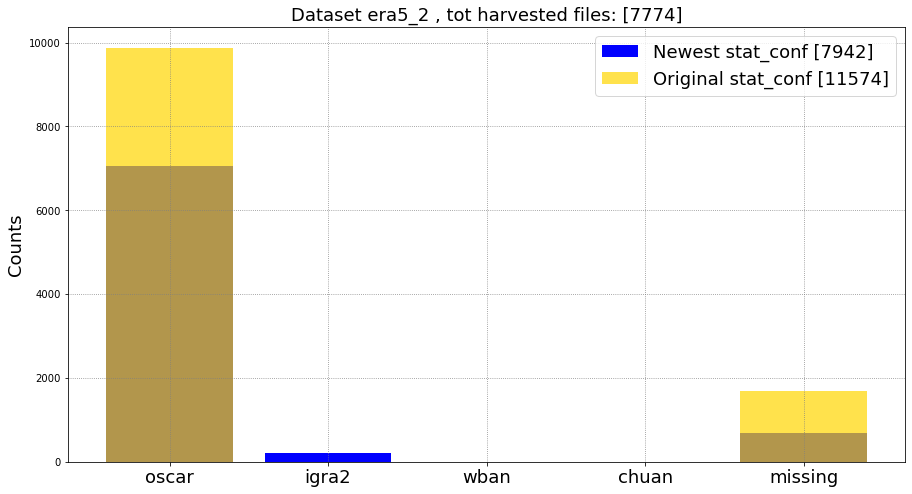

<Figure size 432x288 with 0 Axes>

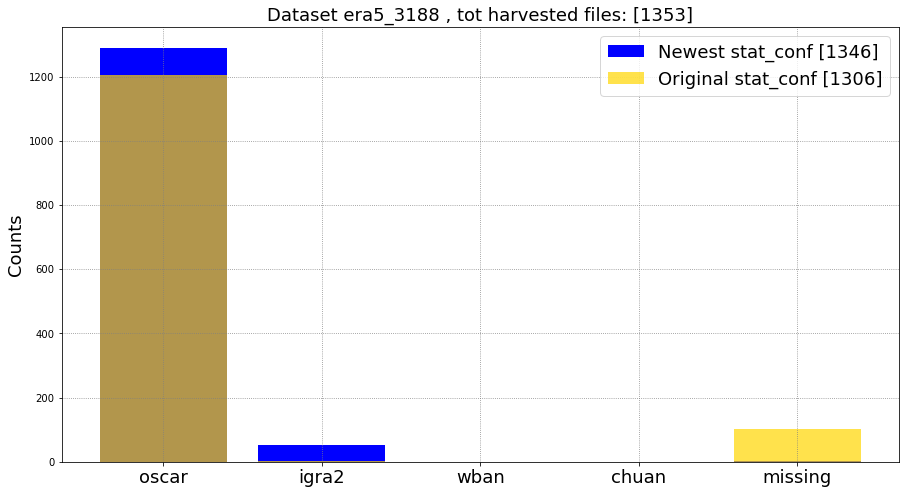

<Figure size 432x288 with 0 Axes>

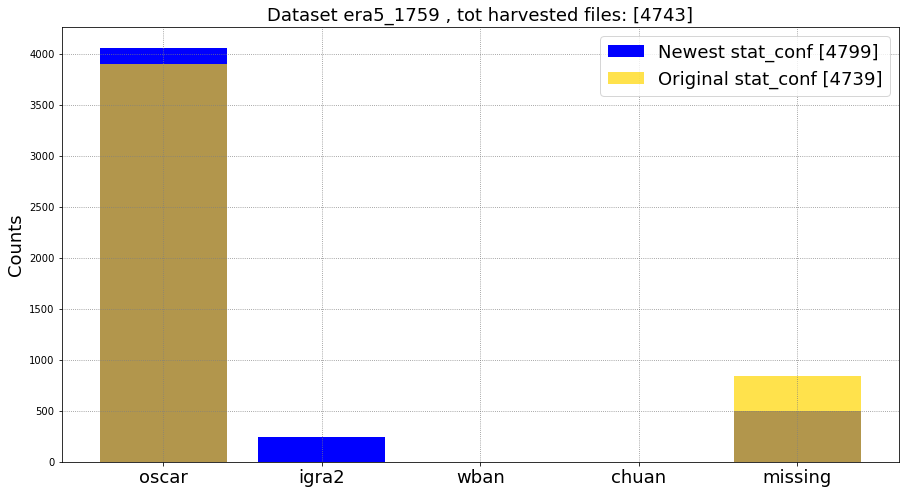

<Figure size 432x288 with 0 Axes>

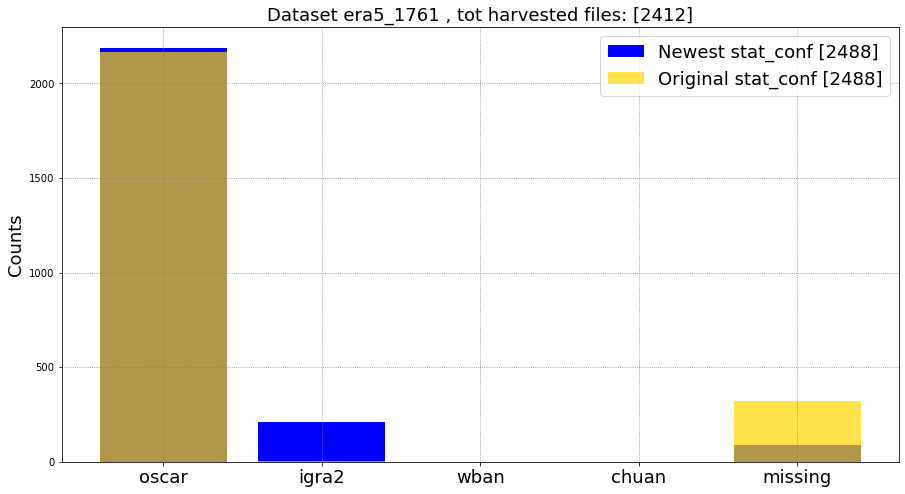

<Figure size 432x288 with 0 Axes>

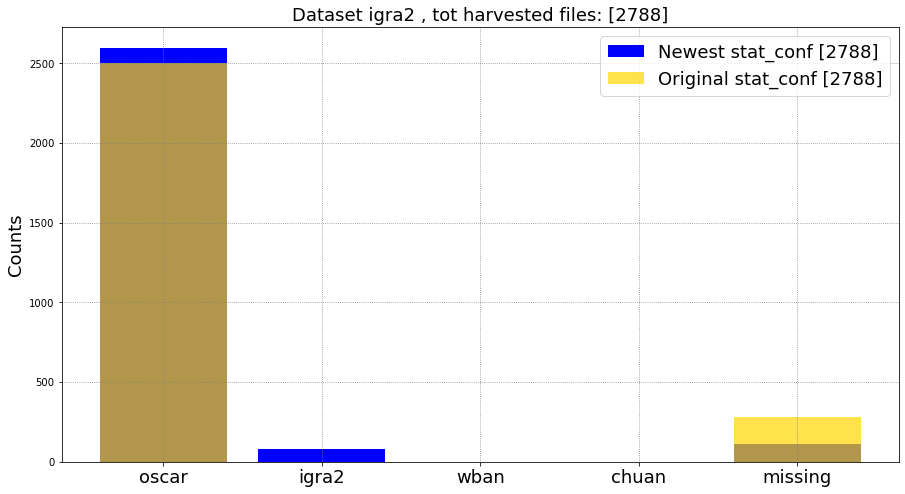

Finished analyzing station_configurations files 


<Figure size 432x288 with 0 Axes>

In [7]:
""" Check missing stations from all datasets """

import pandas as pd
import xarray as xr
import os,sys
import numpy as np
import glob
import matplotlib.pyplot as plt

""" Create a list of up-to-date missing station files, taken from the harvested files """
harvested_dir = '/raid60/scratch/federico/HARVESTED_JAN2021/'
dirs = ['bufr', 'ncar' , 'era5_1' , 'era5_2' , 'era5_3188' , 'era5_1759' , 'era5_1761' , 'igra2' ]

a = open('unidentified_station_files.txt' , 'w')
'''
for d in dirs:
    for f in os.listdir(harvested_dir + '/' + d):
        if '.nc' not in f:
            continue
        if f[0] == '-':
            if d == 'era5_1':
                name = f.split('_harvested_')[1].replace('.??????','').replace('.txt.gz.nc','')
            else:
                name = f.split('_harvested_')[1].replace('.gz.nc','').replace('.nc','')
            a.write(d + '\t' + name + '\n')
       
a.close()     
df = pd.read_csv('unidentified_station_files.txt')
'''

""" Dowload orginal stat_conf file """
d = 'raw.githubusercontent.com/MBlaschek/CEUAS/'
os.system('mkdir first_stat_conf' )
F = [d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_ncar.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_3188.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_1761.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_1.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_bufr.dat',
        d+'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_1759.dat',
        d+'caaaef77338ba3eb726b74d45cdc9adf1dd9ab29/CEUAS/public/harvest/data/station_configurations/station_configuration_era5_2.dat' ,
        d + 'b44108ec9aa38c470b3b5355e82d6eff35a0dee3/CEUAS/public/harvest/data/station_configurations/station_configuration_igra2.dat' ]

for f in F:
   os.system('wget -P old_stat_conf ' + f )
    

""" Copy most up-to-date stat_conf files """
os.system ('cp -r /raid8/srvx1/federico/GitHub/CEUAS_master_JANUARY2021/CEUAS/CEUAS/public/harvest/data/station_configurations new_stat_conf')        

def count(df):
    oscar, igra2, wban, chuan, missing = 0,0,0,0,0
    pids = list (df['primary_id'].astype(str) )
    
    for p in pids:
        if p[0] == '-' or  '[' in p :  # possibile missing stat identifier 
            missing += 1 
            #print('missing ' , p )
        elif '-2000' in p:
            oscar += 1
        elif '-20300':
            igra2 += 1
        elif '-20400':
            wban += 1
        elif '-20500':
            chuan += 1      
        else: 
            print('oscar' , p)
            oscar += 1
            
    return oscar, igra2, wban, chuan, missing
    

dirs = ['bufr', 'ncar' , 'era5_1' , 'era5_2' , 'era5_3188' , 'era5_1759' , 'era5_1761' , 'igra2']

for d in dirs:
    name = 'station_configuration_' + d + '.dat'
    new = pd.read_csv( 'new_stat_conf' + '/' + name , sep = '\t'  )
    old   = pd.read_csv( 'old_stat_conf' + '/' + name , sep = '\t'  )
    
    oscar, igra2, wban, chuan, missing = count(new)
    y_n = [oscar, igra2, wban, chuan, missing]
    
    oscar, igra2, wban, chuan, missing = count(old)
    y_o = [oscar, igra2, wban, chuan, missing]
    
    x = [1,2,3,4,5]
    

    fs = 18
    fig, ax = plt.subplots(figsize=(15,8))
    labels = ['', 'oscar', 'igra2', 'wban', 'chuan', 'missing']
    ax.set_xticklabels(labels, fontsize = fs)
    
    harvested_files = str( len ( [ f for f in os.listdir(harvested_dir + '/' + d) if '_harvested_' in f ] ) )
    
    plt.bar(x, y_n , color= 'blue', label = 'Newest stat_conf [' + str(sum(y_n)) + ']')
    plt.bar(x, y_o , color= 'gold' , label = 'Original stat_conf [' + str(sum(y_o)) + ']', alpha = 0.7)
    plt.legend( fontsize = fs)
    plt.title ('Dataset ' + d + ' , tot harvested files: [' + harvested_files + ']' , fontsize = fs )
    plt.ylabel('Counts' , fontsize = fs)
    os.system ('mkdir Plots_stat_conf' )
    plt.grid(ls = ':' , color = 'gray')
    plt.show()
    plt.savefig('Plots_stat_conf/bars_' + d + '.png' , dpi = 200 )
    0
    #oscar_n, igra2_n, wban_n, chuan_n, missing_n = 0,0,0,0,0 # counting
    #oscar_o, igra2_o, wban_o, chuan_o, missing_o = 0,0,0,0,0 # counting

    

print('Finished analyzing station_configurations files ')

In [8]:
files = glob.glob('/raid60/scratch/leo/scratch/era5/odbs/1/era5.conv._*')
print(len(files))

4697
